In [12]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [24]:
a = np.load('../data/dates.npy')

In [25]:
a

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 17)],
      dtype=object)

In [13]:
encoder = Model(input_img, encoded)

In [14]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [16]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [18]:
autoencoder.fit(x_train, x_train,
                epochs=80,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 3s 50us/step - loss: 0.3575 - val_loss: 0.2699
Epoch 2/80
60000/60000 [==============================] - 3s 46us/step - loss: 0.2615 - val_loss: 0.2496
Epoch 3/80
60000/60000 [==============================] - 3s 44us/step - loss: 0.2389 - val_loss: 0.2265
Epoch 4/80
60000/60000 [==============================] - 3s 43us/step - loss: 0.2185 - val_loss: 0.2087
Epoch 5/80
60000/60000 [==============================] - 3s 44us/step - loss: 0.2034 - val_loss: 0.1958
Epoch 6/80
60000/60000 [==============================] - 3s 44us/step - loss: 0.1921 - val_loss: 0.1861
Epoch 7/80
60000/60000 [==============================] - 3s 44us/step - loss: 0.1836 - val_loss: 0.1786
Epoch 8/80
60000/60000 [==============================] - 3s 43us/step - loss: 0.1770 - val_loss: 0.1727
Epoch 9/80
60000/60000 [==============================] - 3s 44us/step - loss: 0.1715 - val_loss: 0.1676
Epoch

Epoch 78/80
60000/60000 [==============================] - 2s 34us/step - loss: 0.0984 - val_loss: 0.0968
Epoch 79/80
60000/60000 [==============================] - 2s 34us/step - loss: 0.0983 - val_loss: 0.0967
Epoch 80/80
60000/60000 [==============================] - 2s 34us/step - loss: 0.0982 - val_loss: 0.0967


In [19]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

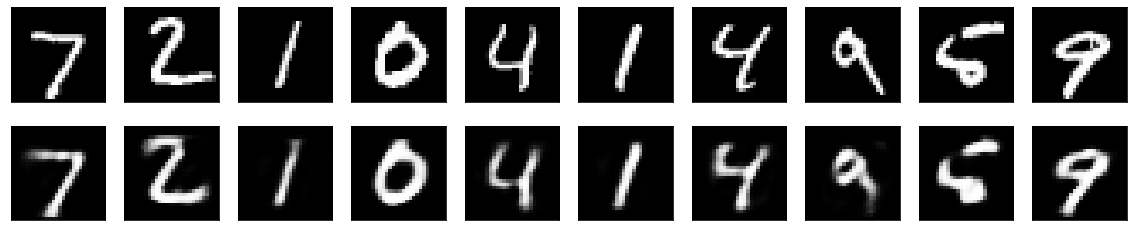

In [20]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
plt.plot()
plt.show()  

### Adding a sparsity constraint on the encoded representations


In [10]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)